In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kaggle-cat-vs-dog-dataset/kagglecatsanddogs_3367a/readme[1].txt
/kaggle/input/kaggle-cat-vs-dog-dataset/kagglecatsanddogs_3367a/MSR-LA - 3467.docx
/kaggle/input/kaggle-cat-vs-dog-dataset/kagglecatsanddogs_3367a/PetImages/Dog/7981.jpg
/kaggle/input/kaggle-cat-vs-dog-dataset/kagglecatsanddogs_3367a/PetImages/Dog/6234.jpg
/kaggle/input/kaggle-cat-vs-dog-dataset/kagglecatsanddogs_3367a/PetImages/Dog/1269.jpg
/kaggle/input/kaggle-cat-vs-dog-dataset/kagglecatsanddogs_3367a/PetImages/Dog/3863.jpg
/kaggle/input/kaggle-cat-vs-dog-dataset/kagglecatsanddogs_3367a/PetImages/Dog/6241.jpg
/kaggle/input/kaggle-cat-vs-dog-dataset/kagglecatsanddogs_3367a/PetImages/Dog/10304.jpg
/kaggle/input/kaggle-cat-vs-dog-dataset/kagglecatsanddogs_3367a/PetImages/Dog/623.jpg
/kaggle/input/kaggle-cat-vs-dog-dataset/kagglecatsanddogs_3367a/PetImages/Dog/2193.jpg
/kaggle/input/kaggle-cat-vs-dog-dataset/kagglecatsanddogs_3367a/PetImages/Dog/11925.jpg
/kaggle/input/kaggle-cat-vs-dog-dataset/kagglecatsanddo

In [2]:
import warnings
warnings.filterwarnings("ignore")

import os
import shutil
import glob

In [3]:
os.listdir("/kaggle/input/kaggle-cat-vs-dog-dataset/kagglecatsanddogs_3367a/PetImages")

['Dog', 'Cat']

In [4]:
os.listdir("/kaggle/input/kaggle-cat-vs-dog-dataset/kagglecatsanddogs_3367a/PetImages/Cat")

['7981.jpg',
 '6234.jpg',
 '1269.jpg',
 '3863.jpg',
 '6241.jpg',
 '10304.jpg',
 '623.jpg',
 '2193.jpg',
 '11925.jpg',
 '3750.jpg',
 '11378.jpg',
 '2008.jpg',
 '10730.jpg',
 '5982.jpg',
 '7737.jpg',
 '2081.jpg',
 '10597.jpg',
 '6588.jpg',
 '10054.jpg',
 '7966.jpg',
 '3919.jpg',
 '6197.jpg',
 '10924.jpg',
 '6399.jpg',
 '9960.jpg',
 '3757.jpg',
 '9131.jpg',
 '9620.jpg',
 '9062.jpg',
 '4489.jpg',
 '3138.jpg',
 '10213.jpg',
 '3417.jpg',
 '6074.jpg',
 '5705.jpg',
 '8953.jpg',
 '764.jpg',
 '5307.jpg',
 '7894.jpg',
 '5039.jpg',
 '10305.jpg',
 '4407.jpg',
 '1700.jpg',
 '1786.jpg',
 '2907.jpg',
 '8930.jpg',
 '11138.jpg',
 '6324.jpg',
 '1075.jpg',
 '4969.jpg',
 '8983.jpg',
 '5584.jpg',
 '10627.jpg',
 '9697.jpg',
 '3501.jpg',
 '10037.jpg',
 '2863.jpg',
 '771.jpg',
 '8352.jpg',
 '208.jpg',
 '12167.jpg',
 '11868.jpg',
 '4640.jpg',
 '7222.jpg',
 '5333.jpg',
 '4125.jpg',
 '6560.jpg',
 '2628.jpg',
 '10162.jpg',
 '8104.jpg',
 '3363.jpg',
 '4009.jpg',
 '9645.jpg',
 '9579.jpg',
 '820.jpg',
 '6943.jpg',
 '

# **Model Building**

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from keras.layers import Dense,Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.preprocessing.image import ImageDataGenerator , load_img, img_to_array
import keras

In [6]:
base_model = InceptionV3(input_shape=(256,256,3), include_top = False)

87910968/87910968 [==============================] - 0s 0us/step


In [7]:
for layer in base_model.layers:
    layer.trainable = False

In [8]:
X = Flatten()(base_model.output)
X = Dense(units=2, activation = 'sigmoid')(X)

#Final Model
model = Model(base_model.input, X)

#Compile the model
model.compile(optimizer = 'adam', loss= keras.losses.binary_crossentropy, metrics=['accuracy'])

#summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 127, 127, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 127, 127, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 127, 127, 32)         0         ['batch_normalization[0][0

# **Pre-Process data using Data Generator**

In [9]:
train_datagen = ImageDataGenerator(featurewise_center = True,
                                   rotation_range = 0.4, 
                                   width_shift_range=0.3,
                                   horizontal_flip=True,
                                   preprocessing_function= preprocess_input, 
                                   shear_range=0.4, zoom_range=0.4)



In [10]:
train_data = train_datagen.flow_from_directory(directory='/kaggle/input/kaggle-cat-vs-dog-dataset/kagglecatsanddogs_3367a/PetImages', 
                                               target_size=(256, 256), batch_size=64)


Found 24959 images belonging to 2 classes.


In [11]:
train_data.class_indices

{'Cat': 0, 'Dog': 1}

# **Data Visualization**

In [12]:
t_img, label = train_data.next()

In [13]:
t_img.shape

(64, 256, 256, 3)

In [14]:
def plotImages(img_arr, label):
    for idx, img in enumerate(img_arr):
        if idx <= 10:
            plt.figure(figsize=(5,5))
            plt.imshow(img)
            plt.title(img.shape)
            plt.axis =  False
            plt.show()

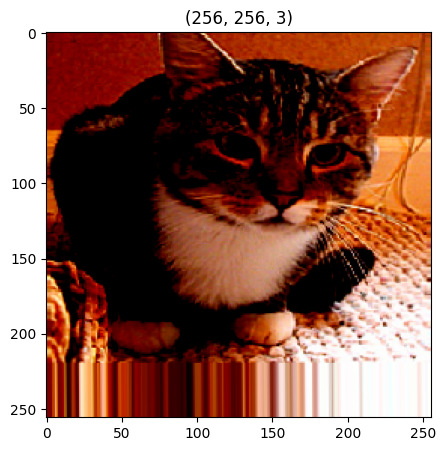

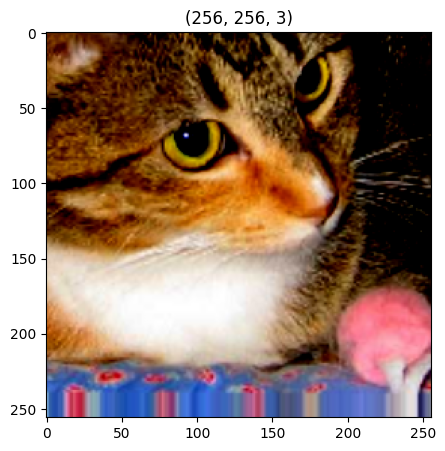

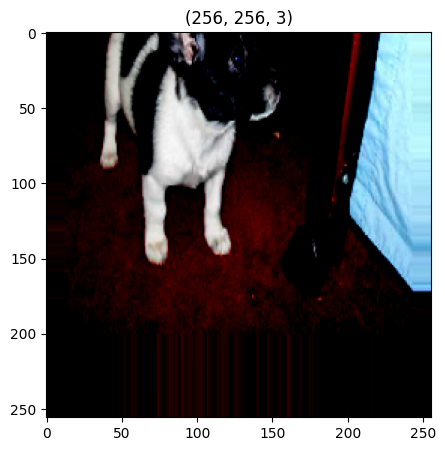

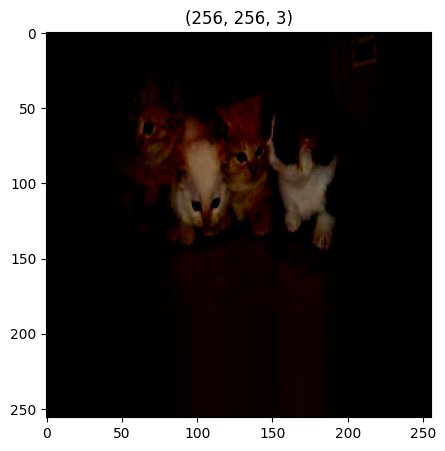

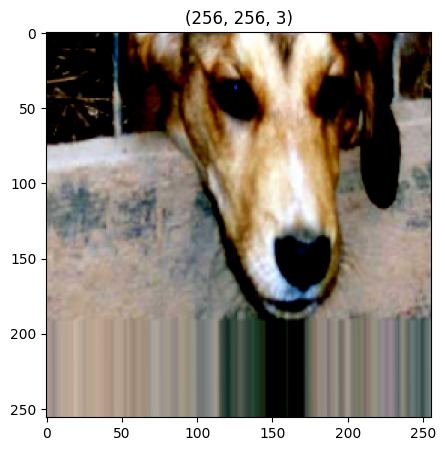

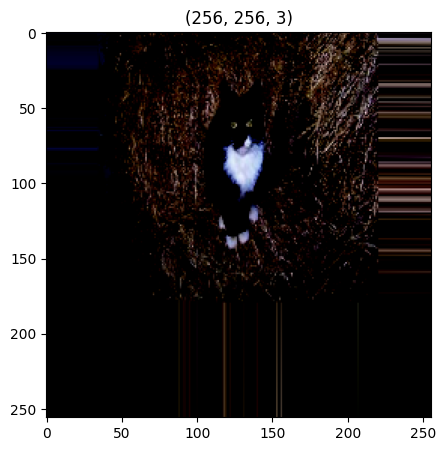

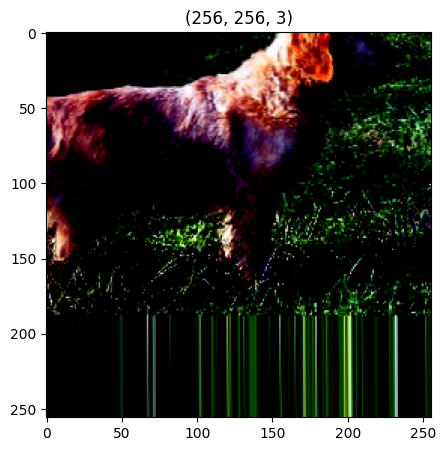

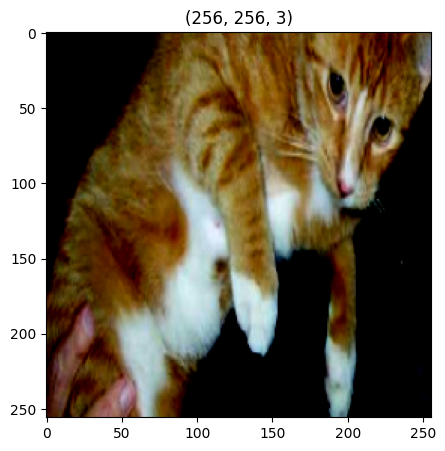

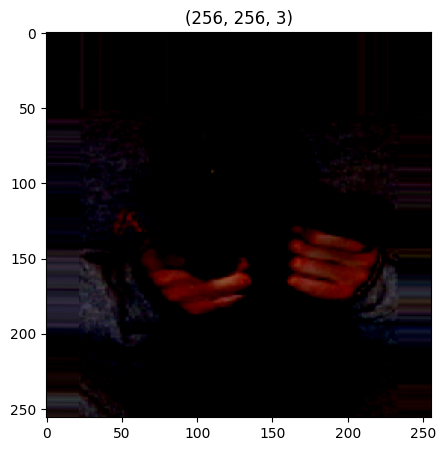

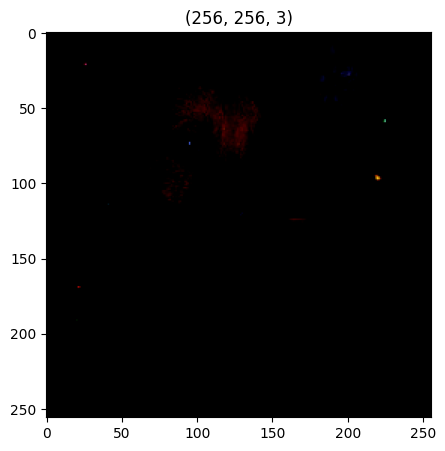

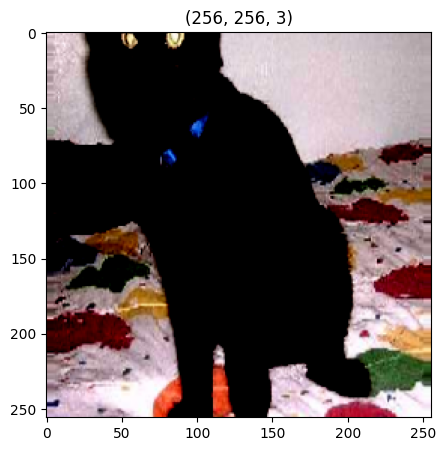

In [15]:
plotImages(t_img, label)

# **Model Checkpoint**

In [16]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

file_path = "/kaggle/working/best_model.h5"

mc = ModelCheckpoint(filepath = file_path,
                    monitor='accuracy',
                    verbose=1,
                    save_best_only = True)

es = EarlyStopping(monitor='accuracy',
                  min_delta= 0.01,
                  patience = 5,
                  verbose = 1)

cb = [mc, es]

In [17]:
his = model.fit_generator(train_data,
                         steps_per_epoch=10,
                         epochs=30,
                         callbacks=cb)

Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 0.5371 - accuracy: 0.8891
Epoch 1: accuracy improved from -inf to 0.88906, saving model to /kaggle/working/best_model.h5
10/10 [==============================] - 27s 1s/step - loss: 0.5371 - accuracy: 0.8891
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 0.1441 - accuracy: 0.9750
Epoch 2: accuracy improved from 0.88906 to 0.97500, saving model to /kaggle/working/best_model.h5
10/10 [==============================] - 17s 2s/step - loss: 0.1441 - accuracy: 0.9750
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 0.1239 - accuracy: 0.9781
Epoch 3: accuracy improved from 0.97500 to 0.97812, saving model to /kaggle/working/best_model.h5
10/10 [==============================] - 16s 2s/step - loss: 0.1239 - accuracy: 0.9781
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 0.1695 - accuracy: 0.9766
Epoch 4: accuracy did not improve from 0.97812
10/10 [==================

In [18]:
from keras.models import load_model
model = load_model(file_path)

In [19]:
h=his.history
h.keys()

dict_keys(['loss', 'accuracy'])

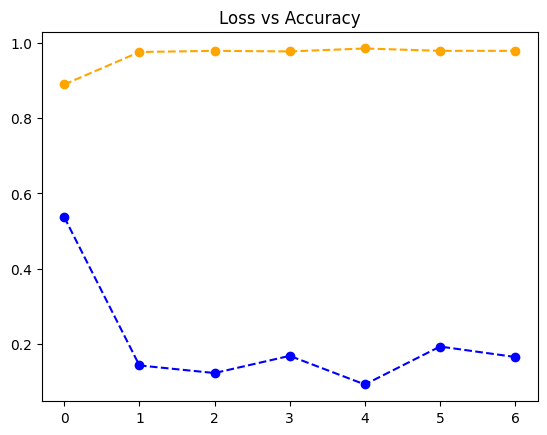

In [20]:
plt.plot(h['loss'], 'go--', c = "blue")
plt.plot(h['accuracy'], 'go--', c = "orange")
plt.title('Loss vs Accuracy')
plt.show()

# **Validate the Model**

1/1 [==============================] - 2s 2s/step
The image is of cat


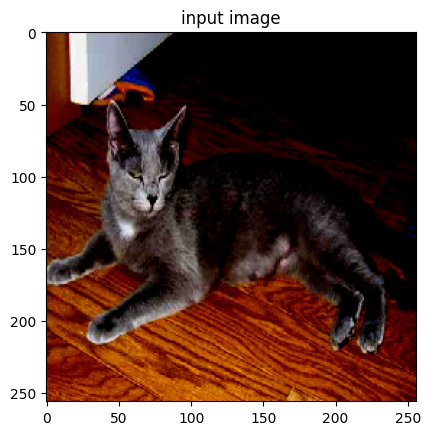

In [21]:
#path for the image to see if predicts the correct class

path = "/kaggle/input/kaggle-cat-vs-dog-dataset/kagglecatsanddogs_3367a/PetImages/Cat/10008.jpg"
img = load_img(path, target_size=(256,256))

i=img_to_array(img)

i=preprocess_input(i)

input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))


if pred == 0:
    print('The image is of cat')
else:
    print('The image is of dog')
    
    
#to display the image
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()

1/1 [==============================] - 0s 26ms/step
The image is of dog


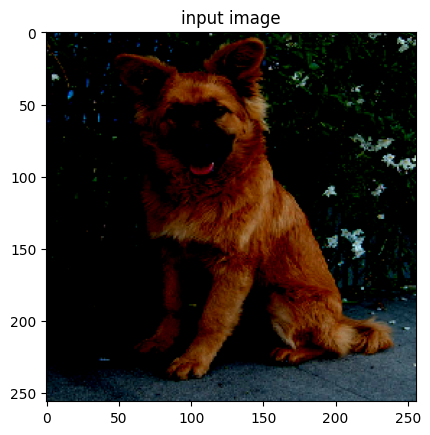

In [22]:
#path for the image to see if predicts the correct class

path = "/kaggle/input/kaggle-cat-vs-dog-dataset/kagglecatsanddogs_3367a/PetImages/Dog/10014.jpg"
img = load_img(path, target_size=(256,256))

i=img_to_array(img)

i=preprocess_input(i)

input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))


if pred == 0:
    print('The image is of cat')
else:
    print('The image is of dog')
    
    
#to display the image
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()

In [23]:
import tensorflow as tf
tf.keras.models.save_model(model,'my_model.hdf5')

In [24]:
!pip install streamlit

  Obtaining dependency information for streamlit from https://files.pythonhosted.org/packages/d3/96/9251b421d0a1c7d625a82a04bea56b8a9830c785940ec16db454b85c6db7/streamlit-1.29.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for validators<1,>=0.2 from https://files.pythonhosted.org/packages/3a/0c/785d317eea99c3739821718f118c70537639aa43f96bfa1d83a71f68eaf6/validators-0.22.0-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 62.0 MB/s eta 0:00:00


In [25]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
st.set_option('depreciation.showfileUploaderEncoding', False)
@st.cache(allow_output_mutation = True)
def load_model():
    model = tf.keras.models.load_model('/kaggle/working/my_model.hdf5')
    return model
model = load_model()
st.write('''
    #Lost and Found Pets (Cats | Dogs)
    '''
        )
file = st.file_uploader("Please upload the picture of the pet found", type=[jpg, png, jpeg,])
import cv2
from PIL import Image, ImageOps
import numpy as np
def import_and_predict(image_data, model):
    size = (256,256)
    image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
    img = np.asrray(image)
    img_reshape = img[np.newaxis,...]
    prediction = model.predict(img_reshape)
    return prediction
if file is None:
    st.text("Please upload an image file")
else:
    image = Image.open(file)
    st.image(image, use_column_width = True)
    predictions = import_and_predict(image, model)
    class_names = ['Dog', 'Cat']
    string = "This is an image of a "+class_names[np.argmax(predictions)]
    st.success(string)

Writing app.py


In [26]:
'''import pickle
model_LogR = '/kaggle/working/model_LogR.sav'
pickle.dump(final_model_LogR, open(model_LogR, 'wb'))
 
# some time later...
 
# load the model from disk
model = pickle.load(open(model_LogR, 'rb'))'''

"import pickle\nmodel_LogR = '/kaggle/working/model_LogR.sav'\npickle.dump(final_model_LogR, open(model_LogR, 'wb'))\n \n# some time later...\n \n# load the model from disk\nmodel = pickle.load(open(model_LogR, 'rb'))"

In [27]:
#!nohup streamlit run app.py

In [28]:
'''file_path = "/kaggle/input/kaggle-cat-vs-dog-dataset/kagglecatsanddogs_3367a/readme[1].txt"

with open(file_path, 'r') as file:
    content = file.read()
    print(content)'''

'file_path = "/kaggle/input/kaggle-cat-vs-dog-dataset/kagglecatsanddogs_3367a/readme[1].txt"\n\nwith open(file_path, \'r\') as file:\n    content = file.read()\n    print(content)'

In [29]:
#!pip install python-docx


In [30]:
'''from docx import Document

file_path = "/kaggle/input/kaggle-cat-vs-dog-dataset/kagglecatsanddogs_3367a/MSR-LA - 3467.docx"

doc = Document(file_path)

# Print the text content of the document
for paragraph in doc.paragraphs:
    print(paragraph.text)'''


'from docx import Document\n\nfile_path = "/kaggle/input/kaggle-cat-vs-dog-dataset/kagglecatsanddogs_3367a/MSR-LA - 3467.docx"\n\ndoc = Document(file_path)\n\n# Print the text content of the document\nfor paragraph in doc.paragraphs:\n    print(paragraph.text)'